In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv("/kaggle/input/retinopathy-dataset/Retinopathy Dataset")

In [6]:
df.sample()

,age,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,has_retinopathy
3025,47.886817,99.437775,75.848035,106.855967,0.0


In [5]:
df.isnull().sum()

age                         0
systolic_blood_pressure     0
diastolic_blood_pressure    0
cholesterol                 0
has_retinopathy             0
dtype: int64

In [8]:
df.dtypes

age                         float64
systolic_blood_pressure     float64
diastolic_blood_pressure    float64
cholesterol                 float64
has_retinopathy             float64
dtype: object

<Axes: >

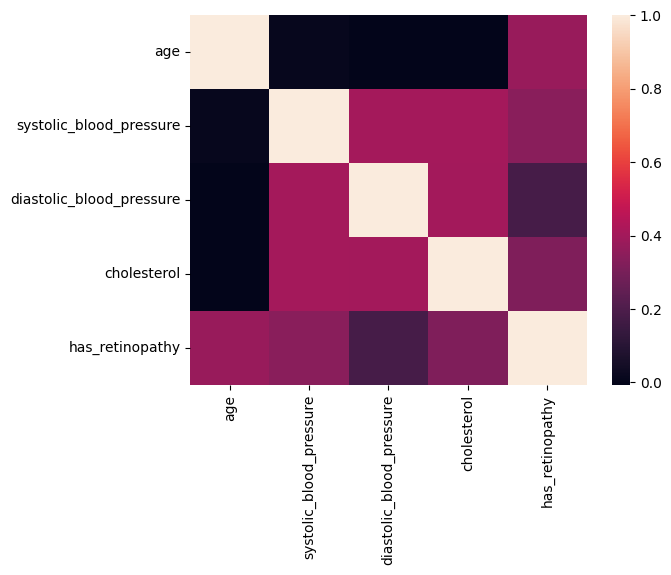

In [10]:
sns.heatmap(df.corr())

In [11]:
X=df.drop(columns=["has_retinopathy"])
Y=df[["has_retinopathy"]]

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [23]:
random_reg=RandomForestClassifier(n_estimators=10)
random_reg.fit(X_train,Y_train)

/tmp/ipykernel_33/3810717397.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_reg.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=10)

In [24]:
random_reg.score(X_test,Y_test)

0.7066666666666667

In [32]:
bagg_class=BaggingClassifier(estimator=RandomForestClassifier(),n_estimators=5)
bagg_class.fit(X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=5)

In [33]:
bagg_class.score(X_test,Y_test)

0.75

In [42]:
neighbor_class=KNeighborsClassifier(n_neighbors=50)
neighbor_class.fit(X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=50)

In [43]:
neighbor_class.score(X_test,Y_test)

0.7475

In [47]:
X_train.shape

(4800, 4)

# Deep Learning

In [74]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Input,LSTM
from keras.callbacks import EarlyStopping

In [54]:
early_stopping=EarlyStopping(
                monitor='val_loss',
                patience=5,
                verbose=1)

In [69]:
model=Sequential([
    Input(shape=(4,)),
    Dense(32,activation="relu",kernel_initializer='he_normal',bias_initializer='zeros'),
    Dropout(0.5),
    Dense(64,activation="relu",kernel_initializer='he_normal',bias_initializer='zeros'),
    Dropout(0.5),
    Dense(128,activation="relu",kernel_initializer='he_normal',bias_initializer='zeros'),
    
    Dense(1,activation="sigmoid")
])

In [70]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])
model.fit(X_train,Y_train,epochs=100,batch_size=32,validation_data=(X_test,Y_test),validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5089 - loss: 39.9436 - val_accuracy: 0.4717 - val_loss: 2.0664
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4940 - loss: 9.4892 - val_accuracy: 0.5167 - val_loss: 0.9021
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4910 - loss: 5.9683 - val_accuracy: 0.4483 - val_loss: 1.0684
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5002 - loss: 3.8468 - val_accuracy: 0.4658 - val_loss: 0.8641
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5048 - loss: 2.7637 - val_accuracy: 0.4333 - val_loss: 0.7653
Epoch 5: early stopping


In [71]:
loss,accuracy=model.evaluate(X_test,Y_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4416 - loss: 0.7641


LSTM 

In [82]:
X_train_reshaped=X_train.values.reshape(X_train.shape[0],1,X_train.shape[1])
X_train_reshaped.shape

(4800, 1, 4)

In [85]:
model2=Sequential([
    Input(shape=(100,4)),
    LSTM(
    units=32,
    activation="tanh",
    recurrent_activation="sigmoid",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    unit_forget_bias=True,
#     kernel_regularizer=l2(0.01),
#     recurrent_regularizer=l2(0.01),
#     bias_regularizer=l2(0.01),
#     activity_regularizer=l2(0.01),
    dropout=0.2,
    recurrent_dropout=0.2,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,),
    Dense(1,activation="sigmoid")
    
])

In [87]:
model2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model2.fit(X_train_reshaped,Y_train,epochs=100,batch_size=42,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5318 - loss: 0.6981 - val_accuracy: 0.5823 - val_loss: 0.6855
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5414 - loss: 0.6888 - val_accuracy: 0.5896 - val_loss: 0.6831
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5414 - loss: 0.6883 - val_accuracy: 0.5958 - val_loss: 0.6799
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5320 - loss: 0.6907 - val_accuracy: 0.5948 - val_loss: 0.6799
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5371 - loss: 0.6884 - val_accuracy: 0.5813 - val_loss: 0.6796
Epoch 5: early stopping


# # Quantum Machine Learning

In [ ]:
!pip install cirq tensorflow_quantum

In [98]:
import cirq
import tensorflow as tf
import tensorflow_quantum as tfq

convert data to quantum_data

In [100]:
#### X_train
qubit=cirq.GridQubit.rect(2,2)
for i,values in enumerate(X_train):
    cirq.Circuit(cirq.X(qubit(i)))
    
    

TypeError: 'list' object is not callable

quantum model

In [101]:
model=Input(shape=df.dtypes.)
model.add(tfq.layers.PQC(quantum_circuit))
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])
model.fit(quantum_data,Y_test,epochs=100,batch_size=42,)

SyntaxError: invalid syntax (2877946650.py, line 1)